# IMPORT

In [6]:
import os, sys, datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Création Data Frame

In [7]:
df = pd.read_csv('churn.csv')

In [8]:
df['Churn']= df['Churn'].apply(lambda x : 1 if x=='Yes' else 0)

df['TotalCharges']=pd.to_numeric(df['TotalCharges'])
df = df.dropna()

In [9]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [10]:
X = df.drop(columns=["customerID","Churn"])

y = df["Churn"]


X.shape, y.shape

((7032, 19), (7032,))

In [11]:
# Séparation train/val/test (80/20 puis 20% de train pour val)
X_train_0, X_test, y_train_0, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# On prend 20% de X_train pour validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_0, y_train_0, test_size=0.2, random_state=42, stratify=y_train_0
)
X_train.shape, X_test.shape, X_val.shape, X_test.shape, y_val.shape, y_test.shape

((4500, 19), (1407, 19), (1125, 19), (1407, 19), (1125,), (1407,))

In [12]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report


features_of_interest = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
    'PaymentMethod', 'MonthlyCharges', 'TotalCharges'
]

numerical_column = ['tenure','MonthlyCharges','TotalCharges']


target_name = 'Churn'

categorical_column = [
    'gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
    'StreamingTV','StreamingMovies','Contract','PaperlessBilling'
]

one_hot_column = ['PaymentMethod']


# PIPELINE

In [14]:
preprocessor = ColumnTransformer(
    [('categorical', OrdinalEncoder(), categorical_column),
     ('one_hot', OneHotEncoder(handle_unknown='ignore'), one_hot_column),
     ('numeric', StandardScaler(), numerical_column)
    ],
    remainder='passthrough'
)

In [15]:
# Normalisation des features numériques
X_train = preprocessor.fit_transform(X_train)
X_val  = preprocessor.transform(X_val)
X_test  = preprocessor.transform(X_test)
X_train[:5], X_val[:5], X_test[:5]

(array([[ 1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
          0.        ,  0.        ,  2.        ,  0.        ,  0.        ,
          2.        ,  0.        ,  0.        ,  0.        ,  1.        ,
          0.        ,  0.        ,  0.        ,  1.        , -1.24544953,
         -0.35110108, -0.97553063],
        [ 1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
          0.        ,  2.        ,  1.        ,  1.        ,  1.        ,
          1.        ,  1.        ,  1.        ,  1.        ,  0.        ,
          1.        ,  0.        ,  0.        ,  0.        ,  0.62934087,
         -1.50480072, -0.56967839],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
          0.        ,  0.        ,  0.        ,  2.        ,  0.        ,
          0.        ,  2.        ,  0.        ,  1.        ,  1.        ,
          0.        ,  1.        ,  0.        ,  0.        ,  0.26253406,
         -0.21232272, -0.02984005],
    

# BASELINE

In [16]:
# from sklearn.pipeline import make_pipeline
# from sklearn.linear_model import LogisticRegression

# logistic_regression_model = make_pipeline(preprocessor,LogisticRegression())
# logistic_regression_model.fit(X_train_0, y_train_0)

In [17]:
# print('accuracy', logistic_regression_model.score(X_test,y_test))

In [18]:
# from sklearn.metrics import recall_score, f1_score

# predictions = logistic_regression_model.predict(X_test)
# print(recall_score(y_test, predictions))
# print(f1_score(y_test, predictions))


# MODELE

In [19]:
from sklearn.utils import compute_class_weight
import tensorflow as tf

classes = np.unique(y)
weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_train_0)
class_weights = dict(zip(classes, weights))

2025-05-22 10:14:06.415652: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-22 10:14:06.418689: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-22 10:14:06.426671: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747901646.441721 1309435 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747901646.445906 1309435 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747901646.456839 1309435 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [20]:
early_stop= tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',    # surveille la perte de validation
    patience=10,            # tolère 3 époques sans amélioration
    mode="auto",
    restore_best_weights=True
)

In [21]:
checkpoint_path = "churn_deeplearning/churn_best.keras"
os.makedirs(os.path.dirname(checkpoint_path), exist_ok=True)
model_ckpt = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',
    mode="max",  # sauvegarde le modèle qui maximise l’accuracy de validation
    save_best_only=True,
    verbose=1
)

# SOFTMAX

In [22]:
tf.keras.backend.clear_session() 

In [23]:
num_classes = len(np.unique(y))
np.unique(y), num_classes

(array([0, 1]), 2)

In [24]:
y_train

3811    0
5580    0
3094    0
5110    0
7032    1
       ..
3728    0
1744    0
692     0
1716    0
3751    0
Name: Churn, Length: 4500, dtype: int64

In [25]:
import tensorflow as tf

y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_val_cat = tf.keras.utils.to_categorical(y_val, num_classes)
y_test_cat  = tf.keras.utils.to_categorical(y_test,  num_classes)
y_train_cat[:5], y_val_cat[:5], y_test_cat[:5]

(array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.]]),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]]),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.]]))

In [26]:
def build_model():
    # Réseau avec 2 couches cachées de 64 neurones chacune
    # et une couche de sortie avec activation softmax pour classification
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    # Définition de la fonction de perte, de l'optimiseur et des métriques
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), #fonction coût avec fonction Adam, optimisation des poids
        loss='categorical_crossentropy', # fonction à minimiser
        metrics=['accuracy', 'recall', 'f1_score', tf.keras.metrics.AUC()] # évlaluation de la qualité
    )

    model.summary()

    return model

In [27]:
model = build_model()

E0000 00:00:1747901649.535567 1309435 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1747901649.536087 1309435 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,762 (22.51 KB)

 Trainable params: 5,762 (22.51 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=40,
    batch_size=64,
    class_weight=class_weights,
    verbose=1,
    callbacks=[early_stop, model_ckpt]
)

Epoch 1/40
51/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6741 - auc: 0.7593 - f1_score: 0.6521 - loss: 0.5549 - recall: 0.6741
Epoch 1: val_accuracy improved from -inf to 0.78044, saving model to churn_deeplearning/churn_best.keras
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6877 - auc: 0.7749 - f1_score: 0.6643 - loss: 0.5435 - recall: 0.6877 - val_accuracy: 0.7804 - val_auc: 0.8660 - val_f1_score: 0.7306 - val_loss: 0.4528 - val_recall: 0.7804
Epoch 2/40
40/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7537 - auc: 0.8494 - f1_score: 0.7218 - loss: 0.4889 - recall: 0.7537 
Epoch 2: val_accuracy did not improve from 0.78044
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7504 - auc: 0.8448 - f1_score: 0.7191 - loss: 0.4894 - recall: 0.7504 - val_accuracy: 0.7280 - val_auc: 0.8142 - val_f1_score: 0.7001 - val_loss: 0.5216 - val_recall: 0.7280
Epoch 3/40
38/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7586 - auc: 0.8437 - f1_score: 0.7290 - loss: 0.4740 - r

In [29]:
history.history

{'accuracy': [0.7239999771118164,
  0.745555579662323,
  0.7495555281639099,
  0.7555555701255798,
  0.765333354473114,
  0.7635555267333984,
  0.7677778005599976,
  0.765999972820282,
  0.7664444446563721,
  0.7751111388206482,
  0.7746666669845581],
 'auc': [0.8144317865371704,
  0.8369815349578857,
  0.8414213061332703,
  0.8448805212974548,
  0.8504634499549866,
  0.8539378643035889,
  0.8565659523010254,
  0.8579667210578918,
  0.8592281341552734,
  0.8641029596328735,
  0.8639891147613525],
 'f1_score': [<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.7876197, 0.6059644], dtype=float32)>,
  <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.80849636, 0.62098634], dtype=float32)>,
  <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.8107472, 0.629885 ], dtype=float32)>,
  <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.8156836, 0.6372031], dtype=float32)>,
  <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.82475936, 0.6449226 ], dtype=float32)>,
  <tf.Tensor

# SIGMOID

In [30]:
def build_model():
    # Réseau avec 2 couches cachées de 64 neurones chacune
    # et une couche de sortie avec activation softmax pour classification
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Définition de la fonction de perte, de l'optimiseur et des métriques
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), #fonction coût avec fonction Adam, optimisation des poids
        loss='binary_crossentropy', # fonction à minimiser
        metrics=['accuracy', 'recall', 'f1_score', tf.keras.metrics.AUC()] # évlaluation de la qualité
    )

    model.summary()

    return model

In [31]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
print("\nClassification Report :")
print(classification_report(y_test, y_pred))

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1033
           1       0.56      0.67      0.61       374

    accuracy                           0.77      1407
   macro avg       0.72      0.74      0.72      1407
weighted avg       0.79      0.77      0.78      1407



# LANCEMENT DU MODELE

In [32]:
model = build_model()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,697 (22.25 KB)

 Trainable params: 5,697 (22.25 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=40,
    batch_size=64,
    class_weight=class_weights,
    verbose=1,
    # callbacks=[early_stop, model_ckpt, tensorboard_cb]
)

Epoch 1/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7195 - auc_1: 0.8057 - f1_score: 0.4250 - loss: 0.5351 - recall: 0.7739 - val_accuracy: 0.7458 - val_auc_1: 0.8321 - val_f1_score: 0.4199 - val_loss: 0.5054 - val_recall: 0.7893
Epoch 2/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7444 - auc_1: 0.8439 - f1_score: 0.4132 - loss: 0.4834 - recall: 0.8001 - val_accuracy: 0.7058 - val_auc_1: 0.8311 - val_f1_score: 0.4199 - val_loss: 0.5604 - val_recall: 0.8194
Epoch 3/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7555 - auc_1: 0.8597 - f1_score: 0.4240 - loss: 0.4735 - recall: 0.8371 - val_accuracy: 0.7387 - val_auc_1: 0.8346 - val_f1_score: 0.4199 - val_loss: 0.5164 - val_recall: 0.7826
Epoch 4/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7653 - auc_1: 0.8535 - f1_score: 0.4098 - loss: 0.4713 - recall: 0.7989 - val_accuracy: 0.7644 - val_auc_1: 0.8305 - val_f1_score: 0.4199 - val_loss: 0.4913 - val_recall: 0.7559
Epoch 5/40
71/71 ━━━━━━━━━━━━━━━

In [34]:
%tensorboard --logdir logs/fit

UsageError: Line magic function `%tensorboard` not found.


In [ ]:
%load_ext tensorboard

In [ ]:
log_dir = os.path.join(
    "logs", "fit", datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
)
tensorboard_cb = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,       # enregistre les histogrammes de poids chaque époque
    write_graph=True,       # sauvegarde le graph du modèle
    write_images=True
)

In [ ]:
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=40,
    batch_size=64,
    class_weight=class_weights,
    verbose=1,
    callbacks=[early_stop, model_ckpt, tensorboard_cb]
)

In [ ]:
mylist = sorted(history.history['accuracy'])
mylist

In [ ]:
tf.keras.backend.clear_session()   # libère la mémoire, supprime le graph actuel
# model = build_model()       

In [ ]:
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=40,
    batch_size=64,
    class_weight=class_weights,
    verbose=1,
    callbacks=[early_stop, model_ckpt, tensorboard_cb]
)

# OPTIMISATION

In [ ]:
!pip install keras-tuner --upgrade

In [36]:
import keras_tuner as kt

In [37]:
def build_model(hp):
  model = tf.keras.Sequential()

  model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))

  model.add(tf.keras.layers.Dense(
      hp.Choice('units', [8, 16, 32, 64, 128]),
      activation=hp.Choice('activation', ['relu', 'tanh', 'sigmoid'])))
  
  model.add(tf.keras.layers.Dense(
      hp.Choice('units2', [8, 16, 32, 64, 128]),
      activation=hp.Choice('activation2', ['relu', 'tanh', 'sigmoid'])))
  
  model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )
  return model

In [38]:
# # On instancie le tuner
# tuner = kt.RandomSearch(
#     build_model,
#     objective='val_recall',
#     max_trials=5,
#     project_name='churn_deeplearning',
# )

In [39]:
tuner = kt.GridSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='churn_deeplearning',
    project_name='churn_gridsearch'
)

In [40]:
# Lancement de la recherche
tuner.search(
    X_train,
    y_train_cat,
    epochs=20,
    validation_data=(X_val, y_val_cat),
    # callbacks=[early_stop]
)

tuner.results_summary()

Trial 10 Complete [00h 00m 06s]
val_accuracy: 0.7964444160461426

Best val_accuracy So Far: 0.7973333597183228
Total elapsed time: 00h 00m 59s
Results summary
Results in churn_deeplearning/churn_gridsearch
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 00 summary
Hyperparameters:
units: 8
activation: relu
units2: 8
activation2: relu
Score: 0.7973333597183228

Trial 08 summary
Hyperparameters:
units: 8
activation: relu
units2: 32
activation2: sigmoid
Score: 0.7964444160461426

Trial 09 summary
Hyperparameters:
units: 8
activation: relu
units2: 64
activation2: relu
Score: 0.7964444160461426

Trial 03 summary
Hyperparameters:
units: 8
activation: relu
units2: 16
activation2: relu
Score: 0.7955555319786072

Trial 04 summary
Hyperparameters:
units: 8
activation: relu
units2: 16
activation2: tanh
Score: 0.7955555319786072

Trial 06 summary
Hyperparameters:
units: 8
activation: relu
units2: 32
activation2: relu
Score: 0.7955555319786072

Trial 01 summary
Hyperpa

In [41]:
# 1. Récupérer la liste des meilleurs modèles (ici 1 seul)
best_models = tuner.get_best_models(num_models=1)
best_model  = best_models[0]

# 2. Évaluer sur votre jeu de test
test_loss, test_acc = best_model.evaluate(X_test, y_test_cat, verbose=1)
print(f"→ Test Loss : {test_loss:.4f} — Test Accuracy : {test_acc:.4f}")

/home/addeche/Documents/Projets Python/churn_deeplearning/.venv/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7872 - loss: 0.4309
→ Test Loss : 0.4366 — Test Accuracy : 0.7925


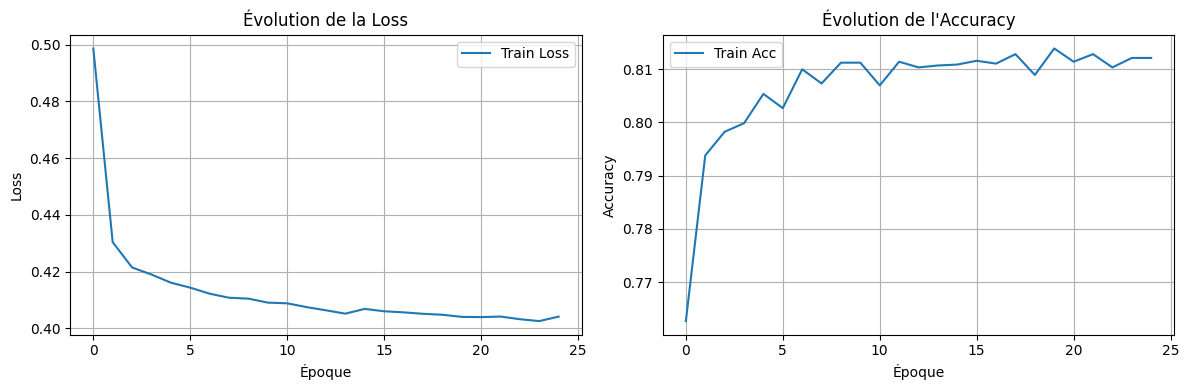

In [43]:
def plot_loss_acc(history, validation=True):
    """
    Trace la loss et l'accuracy du modèle pendant l'entraînement.
    """
    plt.figure(figsize=(12, 4))

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    if validation and 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Évolution de la Loss')
    plt.xlabel('Époque')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Acc')
    if validation and 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title("Évolution de l'Accuracy")
    plt.xlabel('Époque')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()
    
plot_loss_acc(history)

Epoch 1/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 995us/step - accuracy: 0.7248 - loss: 0.5234
Epoch 2/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.7795 - loss: 0.4493
Epoch 3/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7862 - loss: 0.4335  
Epoch 4/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.8004 - loss: 0.4169
Epoch 5/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7962 - loss: 0.4212
Epoch 6/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8008 - loss: 0.4125  
Epoch 7/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8058 - loss: 0.4179  
Epoch 8/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8143 - loss: 0.3975  
Epoch 9/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8060 - loss: 0.4082
Epoch 10/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7954 - loss: 0.4138  
Epoch 11/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7978 - loss: 0.4178
Epoch 12/50
352/352 ━━━━━━━━━━━━━━━━

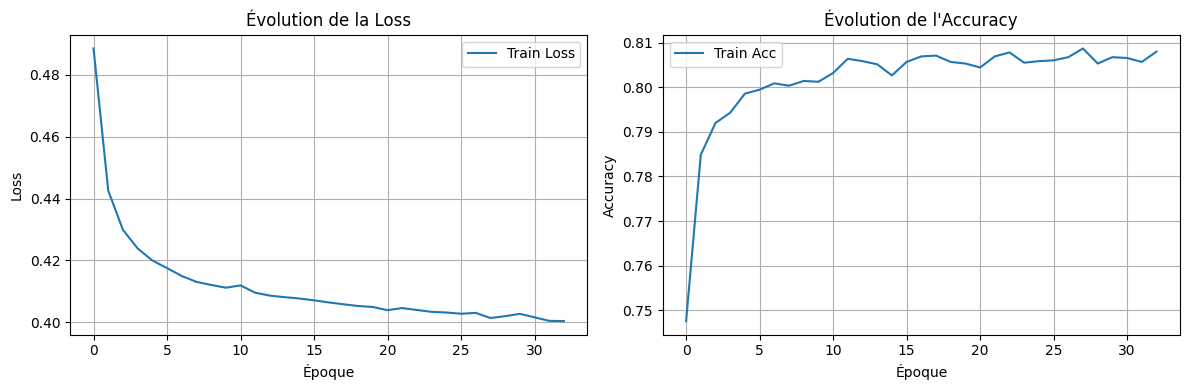

In [44]:
# 1. Récupérer les meilleurs hyperparamètres
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

# 2. Reconstruire le modèle avec ces HP
final_model = build_model(best_hp)

# 3. Réentraîner sur train + val
X_trainval = np.vstack([X_train, X_val])
y_trainval = np.vstack([y_train_cat, y_val_cat])

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy',
    patience=5,
    restore_best_weights=True
)

history = final_model.fit(
    X_trainval, y_trainval,
    epochs=50,
    batch_size=16,
    verbose=1,
    callbacks=[early_stop, model_ckpt]
)
plot_loss_acc(history, validation=False)

In [45]:
test_loss, test_acc = final_model.evaluate(X_test, y_test_cat, verbose=1)
print(f"→ Test Loss (final) : {test_loss:.4f} — Test Acc (final) : {test_acc:.4f}")

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7830 - loss: 0.4339  
→ Test Loss (final) : 0.4398 — Test Acc (final) : 0.7896


In [47]:
y_pred_probs = final_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
print("\nClassification Report (final) :")
print(classification_report(y_test, y_pred))
print("Matrice de Confusion (final) :")
cm = confusion_matrix(y_test, y_pred)
print(cm)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

Classification Report (final) :
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1033
           1       0.62      0.56      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.78      0.79      0.79      1407

Matrice de Confusion (final) :
[[903 130]
 [166 208]]


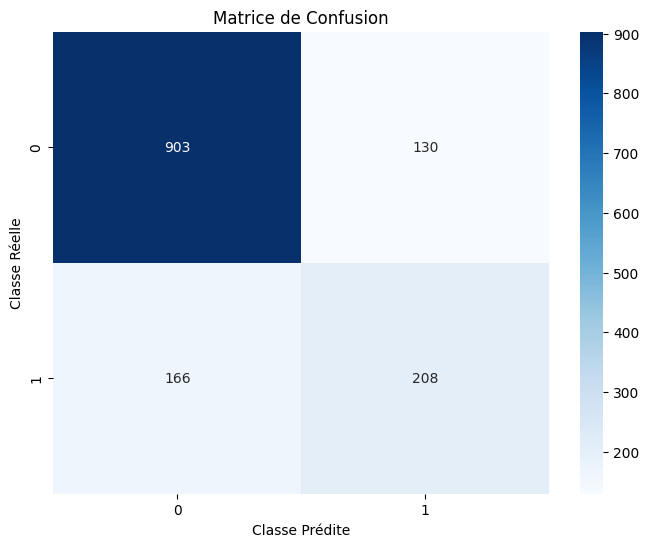

In [49]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de Confusion")
plt.xlabel("Classe Prédite")
plt.ylabel("Classe Réelle")
plt.show()